Neste notebook realizamos uma análise exploratória preliminar a partir dos dados pré-processados de intoxicações por agrotóxicos de uso agrícola. Uma análise completa está disponibilizada na reportagem da Agência Pública e da Repórter Brasil: https://apublica.org/2020/09/exclusivo-agrotoxicos-paraquate-e-glifosato-mataram-214-brasileiros-na-ultima-decada/#Link3
![Reporter Brasil](imagens/reporter-brasil.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from unidecode import unidecode


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)

%matplotlib inline
sns.set(style="darkgrid")

In [2]:
version = 'v5'
df_agro = pd.read_csv('bases_mapeadas/agrotoxicos_mapeados_'+version+'.csv')
print(len(df_agro))
df_agro.head()

/home/cabral/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (25,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


19852


,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_GEO1,ID_GEO2,CS_ZONA,ID_PAIS,DT_INVEST,ID_OCUPA_N,SIT_TRAB,LOC_EXPO,CNAE,UF_EMP,DIS_EMP,COBAIEMP,ZONA_EXP,PAIS_EXP,AGENTE_TOX,COAGTOXMA1,COAGTOXMA2,COAGTOXMA3,AGENTE_1,AGENTE_2,AGENTE_3,P_ATIVO_1,P_ATIVO_MAP,TIPO,P_ATIVO_2,P_ATIVO_3,UTILIZACAO,ATIVIDA_1,ATIVIDA_2,ATIVIDA_3,VIA_1,VIA_2,VIA_3,CIRCUNSTAN,DOENCA_TRA,TPEXP,NUTEMPO,TPTEMPO,TPATENDE,HOSPITAL,DTINTERNA,UF_HOSP,MUN_HOSP,CLASSI_FIN,DIAG_CONF,CRITERIO,EVOLUCAO,DT_OBITO,CAT,DT_ENCERRA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,IDENT_MICR,TRAB_DESC,LOC_EXP_DE,OUT_AGENTE,UTIL_DESC,LAVOURA,CIRCUN_DES,NU_LOTE_I,END_EMP
0,782830,2,T659,2010-01-02,200952,2010,26,261160,1497.0,655.0,2010-01-02,200952,1983-10-18,4026,M,6.0,4.0,9.0,26.0,261160.0,NaN,NaN,1.0,1,2010-01-02,NaN,99.0,1.0,0,26.0,119.0,859.0,1.0,1,2,820,0,0,ALDICARB,NaN,NaN,ALDICARB,ALDICARBE,princípio ativo,NaN,NaN,4.0,99.0,NaN,NaN,1.0,NaN,NaN,10.0,2.0,1.0,2,1.0,1.0,2.0,NaN,NaN,NaN,1.0,T60,3.0,1.0,NaN,3.0,2010-01-03,2010-02-24,NaN,NaN,2010-02-26,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RUA RENASCENCA
1,782789,2,T659,2010-01-01,200952,2010,26,261160,1497.0,655.0,2010-01-01,200952,1987-01-03,4022,F,9.0,4.0,9.0,26.0,261160.0,NaN,NaN,NaN,1,2010-01-01,NaN,99.0,1.0,0,26.0,121.0,884.0,NaN,1,2,820,0,0,ALDICARB,NaN,NaN,ALDICARB,ALDICARBE,princípio ativo,NaN,NaN,9.0,99.0,NaN,NaN,1.0,NaN,NaN,10.0,2.0,1.0,1,1.0,1.0,2.0,NaN,NaN,NaN,1.0,T60,3.0,1.0,NaN,9.0,2010-01-02,2010-02-24,NaN,NaN,2010-02-26,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RUA PENA FORTE
2,782866,2,T659,2010-01-26,201004,2010,26,261160,1497.0,655.0,2010-01-26,201004,2008-07-30,4001,M,6.0,4.0,10.0,26.0,261370.0,NaN,NaN,1.0,1,2010-01-26,NaN,99.0,1.0,0,26.0,NaN,NaN,1.0,1,2,0,0,0,IGNORADO,NaN,NaN,IGNORADO,NAO IDENTIFICADO,?,NaN,NaN,9.0,99.0,NaN,NaN,1.0,NaN,NaN,2.0,2.0,1.0,0,9.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,3.0,1.0,NaN,3.0,2010-01-26,2010-03-16,NaN,NaN,2010-03-30,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RUA MACHADO DE ASSIS
3,4036,2,T659,2010-01-25,201004,2010,50,500790,1975.0,2370816.0,2010-01-25,201004,1988-01-20,4022,M,6.0,1.0,9.0,50.0,500790.0,NaN,NaN,2.0,1,2010-01-25,NaN,99.0,1.0,0,50.0,NaN,NaN,2.0,1,2,1034,0,0,METAMIDOFOS,NaN,NaN,METAMIDOFOS,METAMIDOFOS,princípio ativo,PIRACIOBINA,NaN,1.0,7.0,NaN,NaN,3.0,NaN,NaN,2.0,1.0,1.0,1,1.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,3.0,1.0,NaN,9.0,2010-01-25,2010-02-11,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ASSENTEMENTO ELDORADO
4,340,2,T659,2010-01-14,201002,2010,33,330100,NaN,2287579.0,2010-01-13,201002,1978-11-30,4031,M,6.0,9.0,9.0,33.0,330100.0,NaN,NaN,1.0,1,2010-01-14,999994,99.0,1.0,0,33.0,NaN,NaN,1.0,1,2,0,0,0,ORGANOFOSFORADO / CARBAMATO,NaN,NaN,ORGANOFOSFORADO / CARBAMATO,ORGANOFOSFORADO,grupo químico,NaN,NaN,1.0,9.0,NaN,NaN,1.0,NaN,NaN,10.0,2.0,2.0,0,1.0,1.0,1.0,2010-01-13,33.0,330100.0,1.0,T659,3.0,1.0,NaN,3.0,2010-01-14,2011-07-21,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,BEIRA DA PISTA


# SUBSTÂNCIAS PROIBIDAS

#### Quais são as substâncias proibidas hoje no Brasil? 

In [3]:
#adicionando os pa excluídos da anvisa
sep1 = ' – '
sep2 = ' - '
with open('bases/agrotoxicos excluidos', 'r') as f:
    lines = f.readlines()
    
pa_anvisa_excluidos = []
for l in lines:
    l1 = l.split(sep1)
    if len(l1) > 1:
        pa_anvisa_excluidos.append(l1[1].replace('\n',''))
    else:
        pa_anvisa_excluidos.append(l.split(sep2)[1].replace('\n',''))
pa_anvisa_excluidos = [pa.upper() for pa in pa_anvisa_excluidos]
pa_anvisa_excluidos = [unidecode(pa) for pa in pa_anvisa_excluidos]

print('Quais são as substâncias proibidas hoje no brasil?')
print(pa_anvisa_excluidos)

Quais são as substâncias proibidas hoje no brasil?
['ACETATO DE DINOSEB', 'ALDICARBE', 'ALDRIN', 'ALOXIDIM', 'AZINFOS-ETILICO', 'ANILAZINA', 'ACIDO INDOLIL ACETICO', 'AZOCICLOTINA', 'ANIDRIDO NAFTALICO', 'AZAFENIDINA', 'ALCOOL ISOESTEREARILICO ETOXILADO', 'BEMOMIL', 'BHC', 'BIFENOXI', 'BINAPACRIL', 'BIORESMETRINA', 'BROMOFOS ', 'BROMOFOS-ETILICO', 'BUTACLORO', 'BROMOPROPILATO', 'BUTILATO', 'BENSULIDE', 'BITERTANOL', 'BUTROXIDIM', 'CAPTAFOL', 'CARBOFENOTIONA', 'CARBOFURANO', 'CIANAZINA', 'CLORAMBEM', 'CLORFENVINFOS', 'CLOROBENZILATO', 'CLORTAL-DIMETILICO', 'CUMACLORO', 'CIHEXATINA', 'CLORPROFAN', 'CLOFENTEZINA', 'CUMAFENO', 'CLORFACINONA', 'CIFENOTRINA (RACEMICO)', 'CARPROPAMIDA', 'EDIFENFOS', 'ENDOSSULFAM', 'ENDRIN', 'ETIONA', 'EPTC', 'ETIDIMURON', 'ETRINFOS', 'ETIOFENCARB', 'ESTREPTOMICINA', 'FENCLORFOS', 'FENSULFOTIONA', 'FENTIONA', 'FLUCITRINATO', 'FORATO', 'FORMOTIOM', 'FOSALONA', 'FOSFAMIDONA', 'FENMEDIFAN', 'FYOMONE', 'FENTOATO', 'FURATIOCARBE', 'FENOGREGO', 'ACETATO DE FENTINA',

#### Quais estão na base e quantas intoxicações causaram?

In [4]:
def isInList(word,word_list):
    if word in word_list:
        return True
    else:
        return False
    
df_proibidas = df_agro[df_agro.apply(lambda x: isInList(x['P_ATIVO_MAP'],pa_anvisa_excluidos),axis=1)]
df_proibidas.head()

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_GEO1,ID_GEO2,CS_ZONA,ID_PAIS,DT_INVEST,ID_OCUPA_N,SIT_TRAB,LOC_EXPO,CNAE,UF_EMP,DIS_EMP,COBAIEMP,ZONA_EXP,PAIS_EXP,AGENTE_TOX,COAGTOXMA1,COAGTOXMA2,COAGTOXMA3,AGENTE_1,AGENTE_2,AGENTE_3,P_ATIVO_1,P_ATIVO_MAP,TIPO,P_ATIVO_2,P_ATIVO_3,UTILIZACAO,ATIVIDA_1,ATIVIDA_2,ATIVIDA_3,VIA_1,VIA_2,VIA_3,CIRCUNSTAN,DOENCA_TRA,TPEXP,NUTEMPO,TPTEMPO,TPATENDE,HOSPITAL,DTINTERNA,UF_HOSP,MUN_HOSP,CLASSI_FIN,DIAG_CONF,CRITERIO,EVOLUCAO,DT_OBITO,CAT,DT_ENCERRA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,IDENT_MICR,TRAB_DESC,LOC_EXP_DE,OUT_AGENTE,UTIL_DESC,LAVOURA,CIRCUN_DES,NU_LOTE_I,END_EMP
0,782830,2,T659,2010-01-02,200952,2010,26,261160,1497.0,655.0,2010-01-02,200952,1983-10-18,4026,M,6.0,4.0,9.0,26.0,261160.0,NaN,NaN,1.0,1,2010-01-02,NaN,99.0,1.0,0,26.0,119.0,859.0,1.0,1,2,820,0,0,ALDICARB,NaN,NaN,ALDICARB,ALDICARBE,princípio ativo,NaN,NaN,4.0,99.0,NaN,NaN,1.0,NaN,NaN,10.0,2.0,1.0,2,1.0,1.0,2.0,NaN,NaN,NaN,1.0,T60,3.0,1.0,NaN,3.0,2010-01-03,2010-02-24,NaN,NaN,2010-02-26,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RUA RENASCENCA
1,782789,2,T659,2010-01-01,200952,2010,26,261160,1497.0,655.0,2010-01-01,200952,1987-01-03,4022,F,9.0,4.0,9.0,26.0,261160.0,NaN,NaN,NaN,1,2010-01-01,NaN,99.0,1.0,0,26.0,121.0,884.0,NaN,1,2,820,0,0,ALDICARB,NaN,NaN,ALDICARB,ALDICARBE,princípio ativo,NaN,NaN,9.0,99.0,NaN,NaN,1.0,NaN,NaN,10.0,2.0,1.0,1,1.0,1.0,2.0,NaN,NaN,NaN,1.0,T60,3.0,1.0,NaN,9.0,2010-01-02,2010-02-24,NaN,NaN,2010-02-26,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RUA PENA FORTE
3,4036,2,T659,2010-01-25,201004,2010,50,500790,1975.0,2370816.0,2010-01-25,201004,1988-01-20,4022,M,6.0,1.0,9.0,50.0,500790.0,NaN,NaN,2.0,1,2010-01-25,NaN,99.0,1.0,0,50.0,NaN,NaN,2.0,1,2,1034,0,0,METAMIDOFOS,NaN,NaN,METAMIDOFOS,METAMIDOFOS,princípio ativo,PIRACIOBINA,NaN,1.0,7.0,NaN,NaN,3.0,NaN,NaN,2.0,1.0,1.0,1,1.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,3.0,1.0,NaN,9.0,2010-01-25,2010-02-11,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ASSENTEMENTO ELDORADO
8,782620,2,T659,2010-01-05,201001,2010,26,261160,1497.0,655.0,2010-01-03,201001,1951-04-05,4058,M,6.0,4.0,9.0,26.0,261160.0,NaN,NaN,1.0,1,2010-01-05,NaN,99.0,9.0,0,NaN,NaN,NaN,NaN,0,2,0,0,0,ALDICARD,NaN,NaN,ALDICARD,ALDICARBE,princípio ativo,NaN,NaN,1.0,10.0,NaN,NaN,1.0,NaN,NaN,10.0,2.0,9.0,0,9.0,1.0,1.0,2010-01-06,26.0,261160.0,1.0,T60,2.0,3.0,2010-01-07,3.0,2010-01-08,2010-01-28,NaN,NaN,2011-05-02,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
20,782865,2,T659,2010-01-27,201004,2010,26,261160,1497.0,655.0,2010-01-27,201004,1989-12-28,4020,F,9.0,4.0,9.0,26.0,261070.0,NaN,NaN,1.0,1,2010-01-27,NaN,99.0,1.0,0,26.0,NaN,789.0,1.0,1,2,820,0,0,ALDICARB,NaN,NaN,ALDICARB,ALDICARBE,princípio ativo,NaN,NaN,4.0,99.0,NaN,NaN,1.0,NaN,NaN,10.0,2.0,1.0,0,9.0,1.0,2.0,NaN,NaN,NaN,1.0,T60,3.0,3.0,2010-01-27,3.0,2010-01-27,2010-03-18,NaN,NaN,2010-03-23,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,R. BONITO


In [5]:
print('Quais estão na base e quantas intoxicações causaram?')
print(len(df_proibidas))
print(df_proibidas['P_ATIVO_MAP'].unique())

Quais estão na base e quantas intoxicações causaram?
3764
['ALDICARBE' 'METAMIDOFOS' 'CARBOFURANO' 'PARATION']


#### Quais causaram mais intoxicações?

Quais causaram mais intoxicações?
P_ATIVO_MAP
ALDICARBE      3135
CARBOFURANO     479
METAMIDOFOS     110
PARATION         40
Name: NU_NOTIFIC, dtype: int64


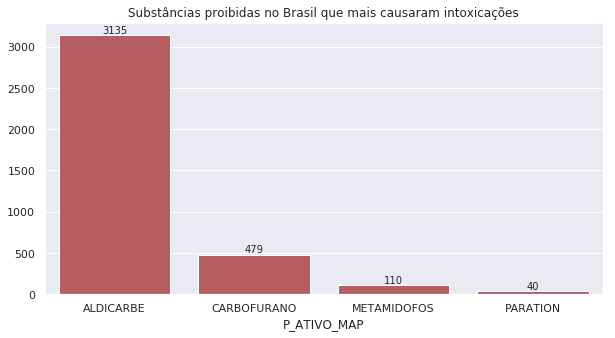

In [6]:
print('Quais causaram mais intoxicações?')
top_proib = df_proibidas.groupby(by='P_ATIVO_MAP').count()['NU_NOTIFIC']
print(top_proib)
plt.figure(figsize=(10,5))
plt.title('Substâncias proibidas no Brasil que mais causaram intoxicações')
labels = top_proib.index
values = top_proib.values
#plt.xticks(values, labels, rotation='vertical')
g = sns.barplot(x=labels, y=values, color = 'C3')

for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                               p.get_height()), ha = 'center', 
               va = 'center', xytext = (0, 5), textcoords = 'offset points')
  




plt.show()

#### Quais os locais com mais intoxicações dessas substâncias?

In [7]:
df_proibidas['UF_EMP'].unique()

array([26., 50., nan, 42., 32., 41., 51., 35., 23., 52., 31., 24., 29.,
       33., 17., 43., 11., 25., 15., 53., 13., 14., 21., 27., 28.])

In [8]:
#mapeamento de código para UF disponibilizado em https://github.com/kelvins/Municipios-Brasileiros/
url = 'https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/master/csv/estados.csv'
cod_uf = pd.read_csv(url)
cod = list(cod_uf['codigo_uf'])
nome_uf = list(cod_uf['nome'])
dict_uf = dict(zip(cod,nome_uf))
df_proibidas['UF_NOME'] = [dict_uf.get(uf,'NAO INFORMADO') for uf in df_proibidas['UF_EMP']]

/home/cabral/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
contagem_ufs = df_proibidas.groupby(by = ['P_ATIVO_MAP','UF_NOME'])['NU_NOTIFIC'].count()
contagem_ufs = contagem_ufs.sort_values(ascending=False)
contagem_ufs = contagem_ufs.to_frame()
contagem_ufs

NU_NOTIFIC
P_ATIVO_MAP UF_NOME                        
ALDICARBE   São Paulo                  1279
            Ceará                       715
            NAO INFORMADO               504
CARBOFURANO NAO INFORMADO               160
ALDICARBE   Paraná                      151
            Pernambuco                  105
            Espírito Santo               91
            Tocantins                    80
CARBOFURANO São Paulo                    60
ALDICARBE   Bahia                        58
CARBOFURANO Espírito Santo               54
ALDICARBE   Minas Gerais                 51
CARBOFURANO Santa Catarina               50
ALDICARBE   Pará                         41
CARBOFURANO Minas Gerais                 39
METAMIDOFOS Paraná                       39
            NAO INFORMADO                32
CARBOFURANO Paraná                       30
            Goiás                        29
ALDICARBE   Goiás                        29
METAMIDOFOS Alagoas                      12
PARATION    NAO INFORMADO                11
CARBOFURANO Mato Grosso                  10
            Rio Grande do Sul            10
            Tocantins                     8
PARATION    Paraná                        7
CARBOFURANO Roraima                       7
            Pernambuco                    6
ALDICARBE   Santa Catarina                6
METAMIDOFOS Pernambuco                    5
PARATION    Minas Gerais                  5
METAMIDOFOS São Paulo                     5
CARBOFURANO Bahia                         5
PARATION    Espírito Santo                5
ALDICARBE   Alagoas                       5
            Rio de Janeiro                4
            Mato Grosso                   4
CARBOFURANO Mato Grosso do Sul            4
METAMIDOFOS Tocantins                     4
ALDICARBE   Distrito Federal              3
PARATION    São Paulo                     3
CARBOFURANO Rondônia                      3
            Ceará                         2
PARATION    Pernambuco                    2
            Paraíba                       2
METAMIDOFOS Mato Grosso                   2
ALDICARBE   Rio Grande do Norte           2
            Mato Grosso do Sul            2
METAMIDOFOS Santa Catarina                2
            Rondônia                      2
CARBOFURANO Pará                          1
METAMIDOFOS Rio de Janeiro                1
PARATION    Pará                          1
            Mato Grosso                   1
            Ceará                         1
ALDICARBE   Maranhão                      1
PARATION    Bahia                         1
METAMIDOFOS Paraíba                       1
ALDICARBE   Paraíba                       1
PARATION    Rondônia                      1
METAMIDOFOS Minas Gerais                  1
ALDICARBE   Rio Grande do Sul             1
METAMIDOFOS Mato Grosso do Sul            1
ALDICARBE   Rondônia                      1
            Sergipe                       1
METAMIDOFOS Espírito Santo                1
            Distrito Federal              1
            Amazonas                      1
CARBOFURANO Rio Grande do Norte           1

In [10]:
# aldicarbe = contagem_ufs.loc['ALDICARBE']
# aldicarbe = aldicarbe['NU_NOTIFIC']


# plt.figure(figsize=(8,8))
# plt.title('ALDICARBE')
# labels = aldicarbe.index
# values = aldicarbe.values
# #plt.xticks(values, labels, rotation='vertical')
# g = sns.barplot(y=labels, x=values, color = 'C0')

# for p in g.patches:
#     g.annotate(format(p.get_width(), '.0f'), (p.get_width(), 
#                                                p.get_y() + p.get_height()/2.), ha = 'center', 
#                va = 'center', xytext = (15, 0), textcoords = 'offset points')
# plt.show()

Quais os locais com mais intoxicações dessas substâncias?


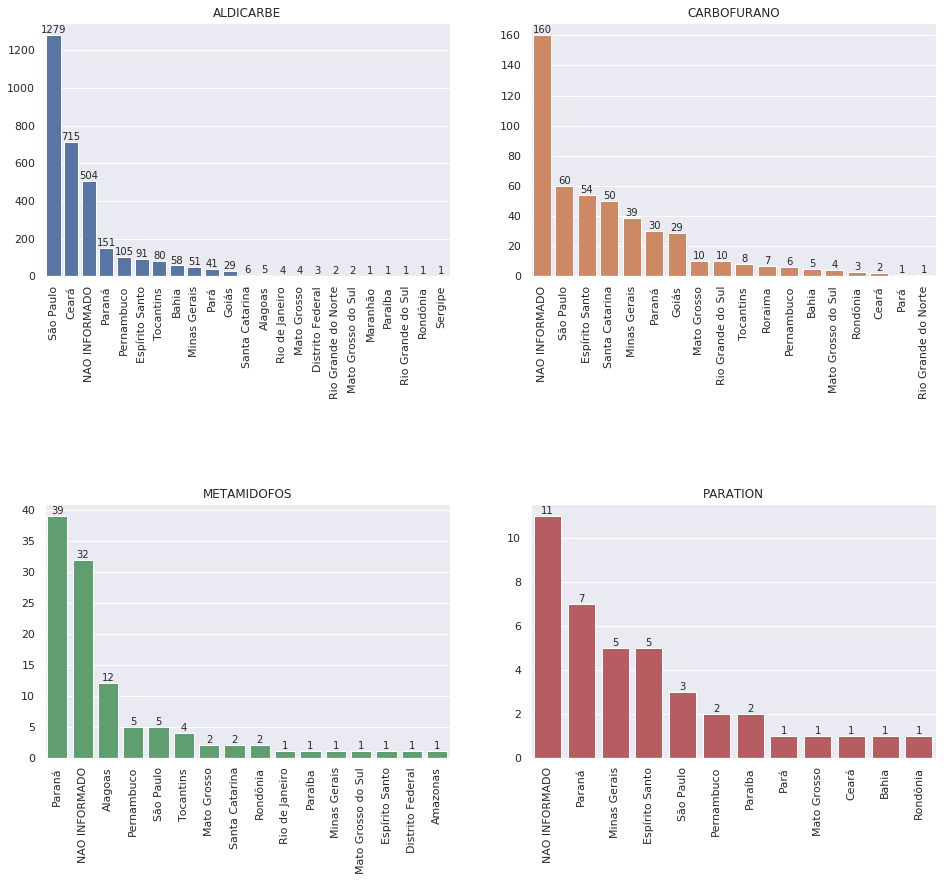

In [11]:
print('Quais os locais com mais intoxicações dessas substâncias?')

aldicarbe = contagem_ufs.loc['ALDICARBE']
aldicarbe = aldicarbe['NU_NOTIFIC']

carbofurano = contagem_ufs.loc['CARBOFURANO']
carbofurano = carbofurano['NU_NOTIFIC']

metamidofos = contagem_ufs.loc['METAMIDOFOS']
metamidofos = metamidofos['NU_NOTIFIC']

paration = contagem_ufs.loc['PARATION']
paration = paration['NU_NOTIFIC']

plt.figure(figsize=(15,12))

plt.subplot(221)
plt.title('ALDICARBE')
#plt.tick_params(axis='x', labelsize=5, length = 0)
labels = list(aldicarbe.index)
values = list(aldicarbe.values)
plt.xticks(values, labels, rotation='vertical')
g = sns.barplot(x=labels, y=values, color = 'C0')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                               p.get_height()), ha = 'center', 
               va = 'center', xytext = (0, 5), textcoords = 'offset points')
#plt.show()

plt.subplot(222)
plt.title('CARBOFURANO')
labels = list(carbofurano.index)
values = list(carbofurano.values)
plt.xticks(values, labels, rotation='vertical')
g = sns.barplot(x=labels, y=values, color = 'C1')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                               p.get_height()), ha = 'center', 
               va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(223)
plt.title('METAMIDOFOS')
labels = list(metamidofos.index)
values = list(metamidofos.values)
plt.xticks(values, labels, rotation='vertical')
g = sns.barplot(x=labels, y=values, color = 'C2')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                               p.get_height()), ha = 'center', 
               va = 'center', xytext = (0, 5), textcoords = 'offset points')
#plt.show()

plt.subplot(224)
plt.title('PARATION')
labels = list(paration.index)
values = list(paration.values)
plt.xticks(values, labels, rotation='vertical')
g = sns.barplot(x=labels, y=values, color = 'C3')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                               p.get_height()), ha = 'center', 
               va = 'center', xytext = (0, 5), textcoords = 'offset points') 
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.95, 
                    wspace=0.2, 
                    hspace=0.9)    
plt.show()

Quais os locais com mais intoxicações dessas substâncias?


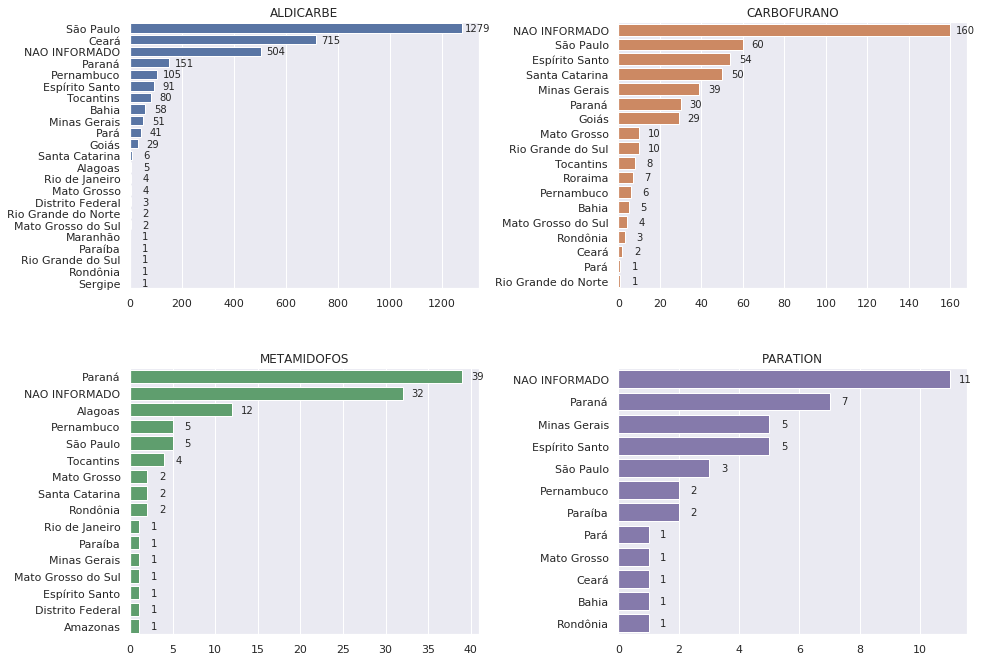

In [12]:
print('Quais os locais com mais intoxicações dessas substâncias?')

aldicarbe = contagem_ufs.loc['ALDICARBE']
aldicarbe = aldicarbe['NU_NOTIFIC']

carbofurano = contagem_ufs.loc['CARBOFURANO']
carbofurano = carbofurano['NU_NOTIFIC']

metamidofos = contagem_ufs.loc['METAMIDOFOS']
metamidofos = metamidofos['NU_NOTIFIC']

paration = contagem_ufs.loc['PARATION']
paration = paration['NU_NOTIFIC']

plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('ALDICARBE')
#plt.tick_params(axis='x', labelsize=5, length = 0)
labels = list(aldicarbe.index)
values = list(aldicarbe.values)
#plt.xticks(values, labels, rotation='vertical')
g = sns.barplot(y=labels, x=values, color = 'C0')
for p in g.patches:
    g.annotate(format(p.get_width(), '.0f'), (p.get_width(), 
                                               p.get_y() + p.get_height()/2.), ha = 'center', 
               va = 'center', xytext = (15, 0), textcoords = 'offset points')
#plt.show()

plt.subplot(222)
plt.title('CARBOFURANO')
labels = list(carbofurano.index)
values = list(carbofurano.values)
#plt.xticks(values, labels, rotation='vertical')
g = sns.barplot(y=labels, x=values, color = 'C1')

for p in g.patches:
    g.annotate(format(p.get_width(), '.0f'), (p.get_width(), 
                                               p.get_y() + p.get_height()/2.), ha = 'center', 
               va = 'center', xytext = (15, 0), textcoords = 'offset points')

plt.subplot(223)
plt.title('METAMIDOFOS')
labels = list(metamidofos.index)
values = list(metamidofos.values)
#plt.xticks(values, labels, rotation='vertical')
g = sns.barplot(y=labels, x=values, color = 'C2')

for p in g.patches:
    g.annotate(format(p.get_width(), '.0f'), (p.get_width(), 
                                               p.get_y() + p.get_height()/2.), ha = 'center', 
               va = 'center', xytext = (15, 0), textcoords = 'offset points')
#plt.show()

plt.subplot(224)
plt.title('PARATION')
labels = list(paration.index)
values = list(paration.values)
#plt.xticks(values, labels, rotation='vertical')
g = sns.barplot(y=labels, x=values, color = 'C4')

for p in g.patches:
    g.annotate(format(p.get_width(), '.0f'), (p.get_width(), 
                                               p.get_y() + p.get_height()/2.), ha = 'center', 
               va = 'center', xytext = (15, 0), textcoords = 'offset points')
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.95, 
                    wspace=0.4, 
                    hspace=0.3)    
plt.show()

# INTOXICAÇÕES CONFIRMADAS
#### Com relação ao total de intoxicações CONFIRMADAS, quais as 10 substâncias  mais recorrentes?

In [23]:
df_agro.columns

Index(['NU_NOTIFIC', 'TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO',
       'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI',
       'SEM_PRI', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'ID_GEO1', 'ID_GEO2', 'CS_ZONA',
       'ID_PAIS', 'DT_INVEST', 'ID_OCUPA_N', 'SIT_TRAB', 'LOC_EXPO', 'CNAE',
       'UF_EMP', 'DIS_EMP', 'COBAIEMP', 'ZONA_EXP', 'PAIS_EXP', 'AGENTE_TOX',
       'COAGTOXMA1', 'COAGTOXMA2', 'COAGTOXMA3', 'AGENTE_1', 'AGENTE_2',
       'AGENTE_3', 'P_ATIVO_1', 'P_ATIVO_MAP', 'TIPO', 'P_ATIVO_2',
       'P_ATIVO_3', 'UTILIZACAO', 'ATIVIDA_1', 'ATIVIDA_2', 'ATIVIDA_3',
       'VIA_1', 'VIA_2', 'VIA_3', 'CIRCUNSTAN', 'DOENCA_TRA', 'TPEXP',
       'NUTEMPO', 'TPTEMPO', 'TPATENDE', 'HOSPITAL', 'DTINTERNA', 'UF_HOSP',
       'MUN_HOSP', 'CLASSI_FIN', 'DIAG_CONF', 'CRITERIO', 'EVOLUCAO',
       'DT_OBITO', 'CAT', 'DT_ENCERRA', 'DT_DIGITA', 'DT_TRANSUS',
       'DT_TRANSDM', 'DT_TRANSSM', 

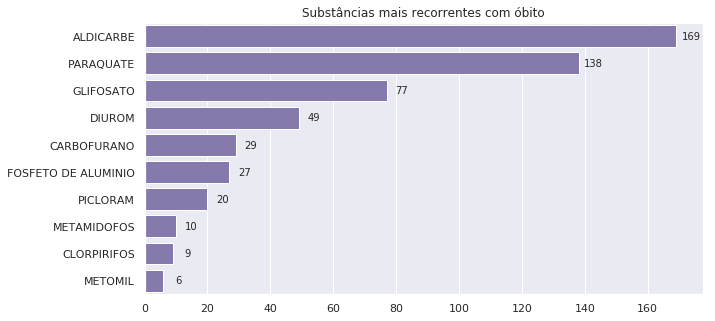

In [25]:
#mais comuns excluindo os desconhecidos e não mapeados
mais_comuns = df_agro[(df_agro['TIPO'] == 'princípio ativo') &
                      (df_agro['EVOLUCAO']==3)].groupby(by='P_ATIVO_MAP').count()
mais_comuns = mais_comuns.sort_values(['NU_NOTIFIC'],ascending = False)['NU_NOTIFIC']
plt.figure(figsize=(10,5))
plt.title('Substâncias mais recorrentes com óbito')
labels = list(mais_comuns[0:10].index)
values = list(mais_comuns[0:10].values)
#plt.xticks(values, labels, rotation='vertical')
g = sns.barplot(y=labels, x=values, color = 'C4')
for p in g.patches:
    g.annotate(format(p.get_width(), '.0f'), (p.get_width(), 
                                               p.get_y() + p.get_height()/2.), ha = 'center', 
               va = 'center', xytext = (15, 0), textcoords = 'offset points')

plt.show()

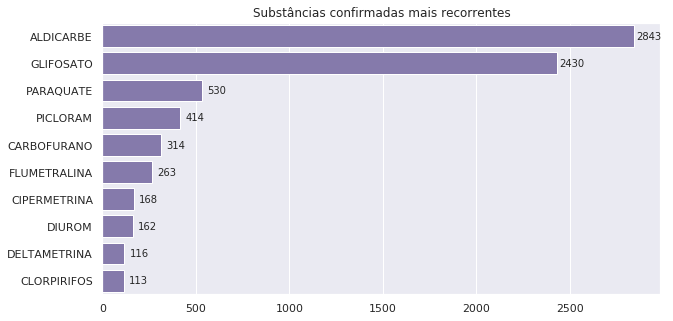

In [26]:
#mais comuns excluindo os desconhecidos e não mapeados
mais_comuns = df_agro[(df_agro['TIPO'] == 'princípio ativo') &
                      (df_agro['CLASSI_FIN']==1)].groupby(by='P_ATIVO_MAP').count()
mais_comuns = mais_comuns.sort_values(['NU_NOTIFIC'],ascending = False)['NU_NOTIFIC']
plt.figure(figsize=(10,5))
plt.title('Substâncias confirmadas mais recorrentes')
labels = list(mais_comuns[0:10].index)
values = list(mais_comuns[0:10].values)
#plt.xticks(values, labels, rotation='vertical')
g = sns.barplot(y=labels, x=values, color = 'C4')
for p in g.patches:
    g.annotate(format(p.get_width(), '.0f'), (p.get_width(), 
                                               p.get_y() + p.get_height()/2.), ha = 'center', 
               va = 'center', xytext = (15, 0), textcoords = 'offset points')

plt.show()

#### Elenque o total de casos por princípios ativos, Estado e Município.

In [14]:
df_agro_conf = df_agro[df_agro['TIPO'] != '?']
df_agro_conf['ID_MUNICIP'].unique()

array([261160, 500790, 330100, ..., 315990, 431846, 430466])

In [15]:
url = 'https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/master/csv/municipios.csv'
#mapeamento de código de municipio para nome, disponibilizado em https://github.com/kelvins/Municipios-Brasileiros/
cod_uf = pd.read_csv(url)
cod = list(cod_uf['codigo_ibge'])
nome_uf = list(cod_uf['nome'])
dict_mun = dict(zip(cod,nome_uf))
df_agro_conf['MUN_NOME'] = [dict_mun.get(uf,'NAO INFORMADO') for uf in df_agro_conf['ID_MUNICIP']]

/home/cabral/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Mostrar a taxa de Letalidade das substâncias ao longo da década: Taxa de Letalidade =  (Nº de óbitos/ Nº de casos confirmados)  X 100

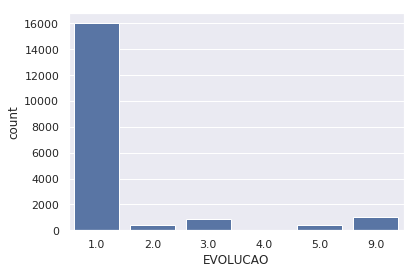

In [16]:
#1 Cura sem sequela
#2 Cura com sequela
#3 Óbito por intoxicação exógena
#4 Óbito por outra causa
#5 Perda do seguimento
#9 Ignorada
sns.countplot(df_agro['EVOLUCAO'],color = 'C0')

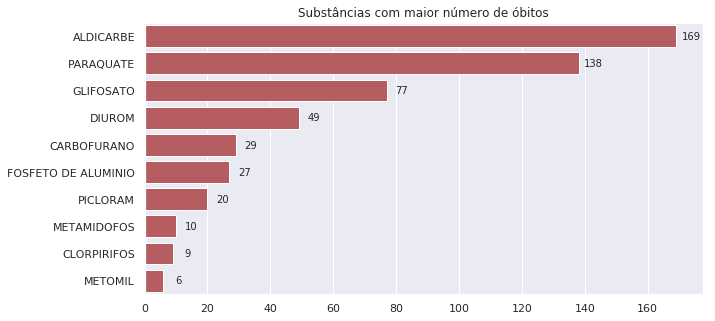

In [17]:
obitos = df_agro[df_agro['EVOLUCAO']==3]
obitos = obitos[obitos['TIPO'] == 'princípio ativo'].groupby(by='P_ATIVO_MAP').count()
obitos = obitos.sort_values(['NU_NOTIFIC'],ascending = False)['NU_NOTIFIC']
plt.figure(figsize=(10,5))
plt.title('Substâncias com maior número de óbitos')
labels = list(obitos[0:10].index)
values = list(obitos[0:10].values)
#plt.xticks(values, labels, rotation='vertical')
g = sns.barplot(y=labels, x=values, color = 'C3')
for p in g.patches:
    g.annotate(format(p.get_width(), '.0f'), (p.get_width(), 
                                               p.get_y() + p.get_height()/2.), ha = 'center', 
               va = 'center', xytext = (15, 0), textcoords = 'offset points')

plt.show()


In [18]:
pa = list(obitos.index)
obts = list(obitos.values)
dict_obts = dict(zip(pa,obts))
total_de_casos = list(mais_comuns.values)
substancias = list(mais_comuns.index) #dict_map.get(pa,('NAO MAPEADO','?'))
total_de_obitos = [dict_obts.get(p,0) for p in substancias]
letalidade = [obt/tot for tot,obt in zip(total_de_casos, total_de_obitos)]
df_letalidade = pd.DataFrame({'P_ATIVO':substancias,
                             'TOTAL_CASOS': total_de_casos,
                             'TOTAL_OBITOS': total_de_obitos,
                             'LETALIDADE': letalidade})
df_letalidade = df_letalidade.sort_values(by='LETALIDADE', ascending = False)
df_letalidade


,P_ATIVO,TOTAL_CASOS,TOTAL_OBITOS,LETALIDADE
160,FENARIMOL,2,1,0.500000
158,ETEFOM,2,1,0.500000
157,DIFETIALONA,2,1,0.500000
155,METIDATIONA,2,1,0.500000
102,FOSFINA,5,2,0.400000
100,TERBUFOS,5,2,0.400000
130,MESOTRIONA,3,1,0.333333
123,TETRAMETRINA,3,1,0.333333
42,DICLORETO DE PARAQUATE,25,6,0.240000
62,DIQUATE,13,3,0.230769


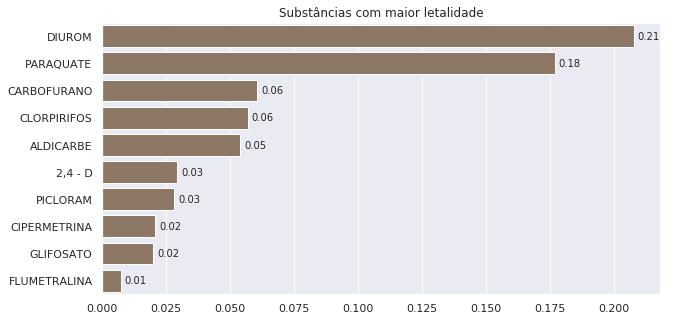

In [19]:
df_letais = df_letalidade[df_letalidade['TOTAL_CASOS'] > 150]
plt.figure(figsize=(10,5))
plt.title('Substâncias com maior letalidade')
labels = list(df_letais['P_ATIVO'][0:10])
values = list(df_letais['LETALIDADE'][0:10])
#plt.xticks(values, labels, rotation='vertical')
g = sns.barplot(y=labels, x=values, color = 'C5')
for p in g.patches:
    g.annotate(format(p.get_width(), '.2f'), (p.get_width(), 
                                               p.get_y() + p.get_height()/2.), ha = 'center', 
               va = 'center', xytext = (15, 0), textcoords = 'offset points')

plt.show()